In [2]:
#!pip install folium

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Subida de Archivos
""""
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
name=fn, length=len(uploaded[fn])))
  
"""

'"\nfrom google.colab import files\nuploaded = files.upload()\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\nname=fn, length=len(uploaded[fn])))\n  \n'

In [52]:
#DATAFRAME
#headerList = [] 
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
df = pd.read_csv("DEFUNCIONES.csv", sep = ";", encoding='latin-1')
df

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2022,2022-02-18,Mujer,1,88,6115,Rengo,Del Libertador B. O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
1,2022,2022-01-29,Mujer,1,86,5101,Valparaíso,De Valparaíso,E039,E00-E90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2022,2022-01-24,Mujer,1,77,5101,Valparaíso,De Valparaíso,K839,K00-K93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
3,2022,2022-01-04,Mujer,1,92,1101,Iquique,De Tarapacá,A419,A00-B99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
4,2022,2022-02-15,Mujer,1,85,13111,La Granja,Metropolitana de Santiago,K754,K00-K93,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729851,2016,2016-08-28,Mujer,1,74,10103,Cochamó,De Los Lagos,E119,E00-E90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
729852,2016,2016-08-30,Mujer,1,86,10209,Quemchi,De Los Lagos,J449,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
729853,2016,2016-08-26,Hombre,1,84,10205,Dalcahue,De Los Lagos,C61X,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
729854,2016,2016-09-02,Mujer,1,90,10205,Dalcahue,De Los Lagos,J459,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [5]:
df.dtypes

ANO_DEF                       int64
FECHA_DEF                    object
GLOSA_SEXO                   object
EDAD_TIPO                     int64
EDAD_CANT                     int64
CODIGO_COMUNA_RESIDENCIA      int64
GLOSA_COMUNA_RESIDENCIA      object
GLOSA_REG_RES                object
DIAG1                        object
CAPITULO_DIAG1               object
GLOSA_CAPITULO_DIAG1         object
CODIGO_GRUPO_DIAG1           object
GLOSA_GRUPO_DIAG1            object
CODIGO_CATEGORIA_DIAG1       object
GLOSA_CATEGORIA_DIAG1        object
CODIGO_SUBCATEGORIA_DIAG1    object
GLOSA_SUBCATEGORIA_DIAG1     object
DIAG2                        object
CAPITULO_DIAG2               object
GLOSA_CAPITULO_DIAG2         object
CODIGO_GRUPO_DIAG2           object
GLOSA_GRUPO_DIAG2            object
CODIGO_CATEGORIA_DIAG2       object
GLOSA_CATEGORIA_DIAG2        object
CODIGO_SUBCATEGORIA_DIAG2    object
GLOSA_SUBCATEGORIA_DIAG2     object
LUGAR_DEFUNCION              object
dtype: object

In [6]:
#Se convierte a formato fecha
fecha=pd.to_datetime(df["FECHA_DEF"], format='%Y-%m-%d')
df["FECHA_DEF"]=fecha
print("Primera Fecha:")
print(min(df.FECHA_DEF))
print()
print("Última Fecha:")
print(max(df.FECHA_DEF))

Primera Fecha:
2016-01-01 00:00:00

Última Fecha:
2022-04-13 00:00:00


In [7]:
#Tarjeta 1
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
cant_defunciones = df.ANO_DEF.count()
print("Cantidad de defunciones desde 1-1-2016 a 13-4-2022")
print(format(cant_defunciones,','))

Cantidad de defunciones desde 1-1-2016 a 13-4-2022
729,856


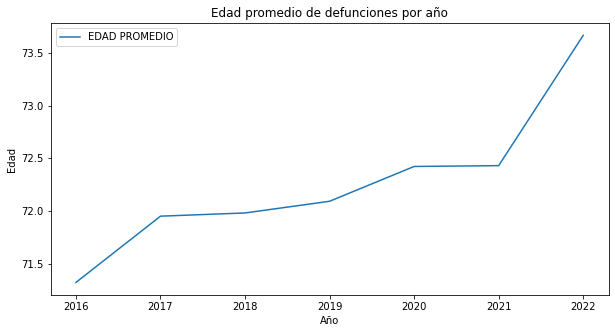

In [20]:
#Gráfico 1
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
#Se eliminan edad tipo 9, ya que se desconoce su significado y solo representa 5 registros
#Uno de los cuales tiene edad 999
df=df[df['EDAD_TIPO'] != 9]
esperanza_vida = df.groupby(["ANO_DEF"])[["EDAD_CANT"]].mean()
esperanza_vida.rename(columns={"EDAD_CANT":"EDAD PROMEDIO"},inplace=True)
#df
grafico = esperanza_vida.plot(kind='line', figsize=(10,5), xlabel='Año',ylabel='Edad', title='Edad promedio de defunciones por año')

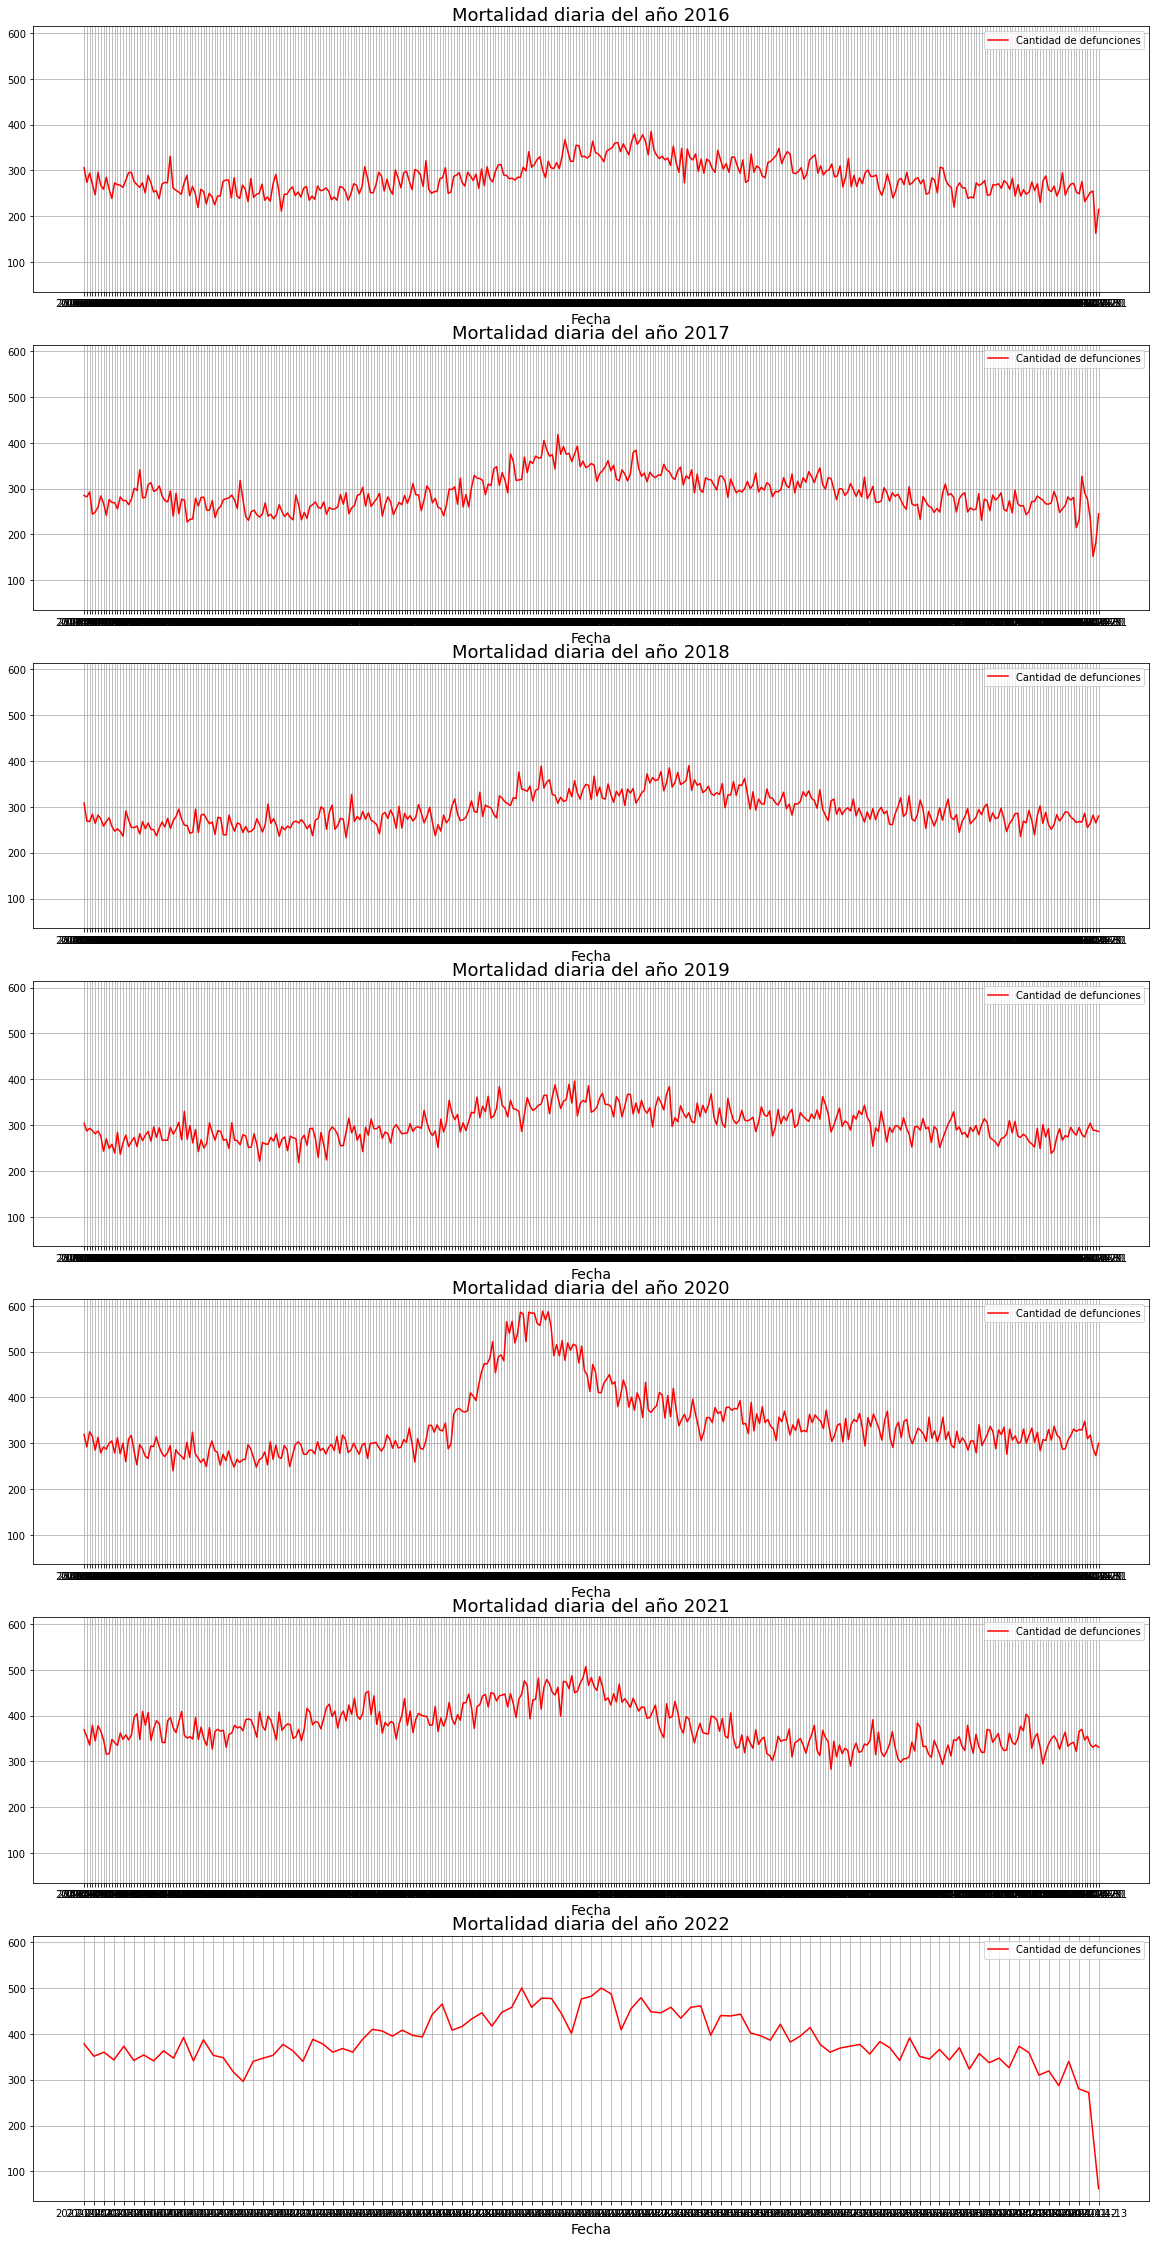

In [21]:
#Gráfico 2
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
################################
def ingresos_ano(ano):
    return df[(df.ANO_DEF == ano)].groupby(['FECHA_DEF']).ANO_DEF.count()
dfano = []
x = []
y = []
#Defino la figura y asigno 4 filas, una para cada año
fig, ax = plt.subplots(nrows = 7,ncols = 1, figsize = (20,40), sharey = True)
for an in range (0,7):
    dfano.append("")
    x.append("")
    y.append("")
    dfano[an] = ingresos_ano(an+2016)
  #dfano[an].index = dfano[an].index.map(str)
    x[an] = dfano[an].index
    y[an] = dfano[an]
    #print(dfano[an])
    ax[an].plot(x[an],y[an], label='Cantidad de defunciones',color='red')
    ax[an].set_title(f'Mortalidad diaria del año {an+2016}', size = 18)
    ax[an].set_xlabel(f'Fecha', size = 14)
    ax[an].tick_params(axis='both', labelsize=10,labelbottom=True)
    #Legend es para otro tipo de graficos, como los lineales o de dispersion
    ax[an].legend()
    ax[an].grid()
plt.show()

In [22]:
df.groupby(df["GLOSA_SEXO"]).count()

,ANO_DEF,FECHA_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
GLOSA_SEXO,,,,,,,,,,,,,,,,,,,,,
Hombre,385890,385890,385890,385890,385890,385890,385890,385890,385890,385890,...,113663,36935,36935,36935,36935,36935,36935,36935,36935,385890
Indeterminado,108,108,108,108,108,108,108,108,108,108,...,1,1,1,1,1,1,1,1,1,108
Mujer,343853,343853,343853,343853,343853,343853,343853,343853,343853,343853,...,85030,12285,12285,12285,12285,12285,12285,12285,12285,343853


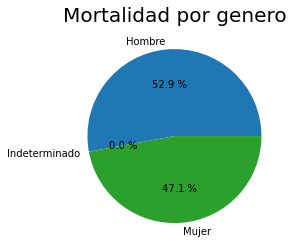

GLOSA_SEXO
Hombre           385890
Indeterminado       108
Mujer            343853
Name: GLOSA_SEXO, dtype: int64


In [23]:
#Gráfico 3
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
num = df.groupby(['GLOSA_SEXO']).GLOSA_SEXO.count()
#gen = df['GLOSA_SEXO'].unique()
#remuneracion = df1.groupby(['AÑO']).SUELDOS.sum()
#anio = df1['AÑO'].astype(int).unique()
plt.pie(num, labels=num.index, autopct="%0.1f %%")
plt.title(f'Mortalidad por genero', size = 20)
plt.show()
print(num)

<ipython-input-24-1fb65e820811>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GLOSA_REG_RES"]=df["GLOSA_REG_RES"].str.replace("De ", "")
<ipython-input-24-1fb65e820811>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GLOSA_REG_RES"]=df["GLOSA_REG_RES"].str.replace("Del ", "")


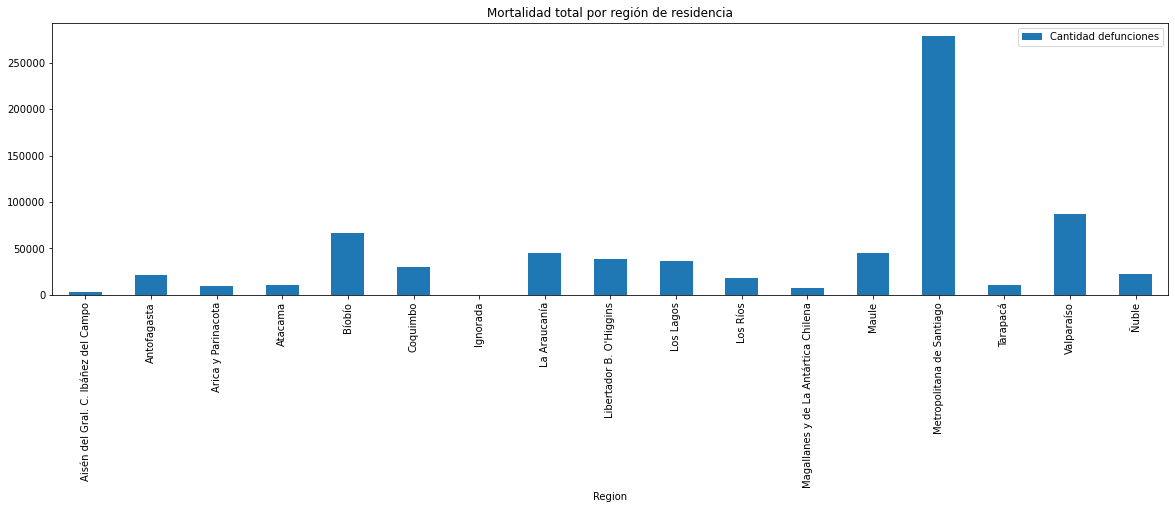

In [24]:
#Gráfico 4
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
df["GLOSA_REG_RES"]=df["GLOSA_REG_RES"].str.replace("De ", "")
df["GLOSA_REG_RES"]=df["GLOSA_REG_RES"].str.replace("Del ", "")
por_region = df.groupby(["GLOSA_REG_RES"], sort=True)[["GLOSA_REG_RES"]].count()
por_region.rename(columns={"GLOSA_REG_RES":"Cantidad defunciones"},inplace=True) 

grafico = por_region.plot(kind='bar', figsize=(20,5), xlabel='Region', title='Mortalidad total por región de residencia')

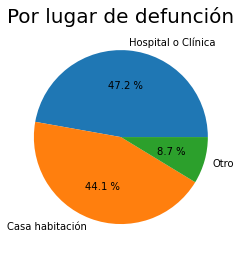

LUGAR_DEFUNCION
Casa habitación       344460
Hospital o Clínica    322015
Otro                   63376
Name: LUGAR_DEFUNCION, dtype: int64


In [25]:
#Gráfico 5
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
num = df.groupby(['LUGAR_DEFUNCION']).LUGAR_DEFUNCION.count()
gen = df['LUGAR_DEFUNCION'].unique()
#remuneracion = df1.groupby(['AÑO']).SUELDOS.sum()
#anio = df1['AÑO'].astype(int).unique()
plt.pie(num, labels=gen, autopct="%0.1f %%")
plt.title(f'Por lugar de defunción', size = 20)
plt.show()
print(num)

In [27]:
df.dtypes

ANO_DEF                       int64
FECHA_DEF                    object
GLOSA_SEXO                   object
EDAD_TIPO                     int64
EDAD_CANT                     int64
CODIGO_COMUNA_RESIDENCIA      int64
GLOSA_COMUNA_RESIDENCIA      object
GLOSA_REG_RES                object
DIAG1                        object
CAPITULO_DIAG1               object
GLOSA_CAPITULO_DIAG1         object
CODIGO_GRUPO_DIAG1           object
GLOSA_GRUPO_DIAG1            object
CODIGO_CATEGORIA_DIAG1       object
GLOSA_CATEGORIA_DIAG1        object
CODIGO_SUBCATEGORIA_DIAG1    object
GLOSA_SUBCATEGORIA_DIAG1     object
DIAG2                        object
CAPITULO_DIAG2               object
GLOSA_CAPITULO_DIAG2         object
CODIGO_GRUPO_DIAG2           object
GLOSA_GRUPO_DIAG2            object
CODIGO_CATEGORIA_DIAG2       object
GLOSA_CATEGORIA_DIAG2        object
CODIGO_SUBCATEGORIA_DIAG2    object
GLOSA_SUBCATEGORIA_DIAG2     object
LUGAR_DEFUNCION              object
dtype: object

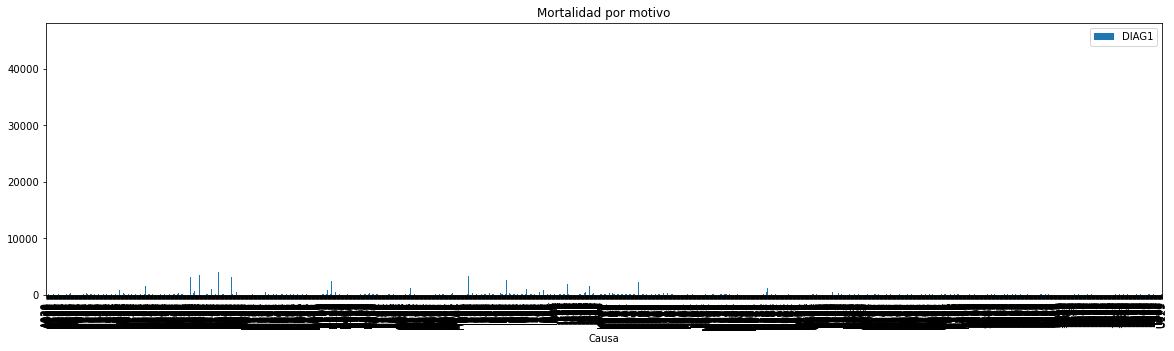

In [14]:
#Gráfico 6
#df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_14042022.csv", sep = ";", encoding='latin-1')
#df
causa = df.groupby(["DIAG1"])[["DIAG1"]].count()
#print(df["DIAG1"].unique())
grafico = causa.plot(kind='bar', figsize=(20,5), xlabel='Causa', title='Mortalidad por motivo')

In [61]:
df2=df.copy()
df2.loc[df2.EDAD_TIPO != 1, 'EDAD_CANT']=0
df2[(df2.EDAD_CANT==0)]

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
28408,2022,2022-01-20,Hombre,2,0,6110,Mostazal,Del Libertador B. O'Higgins,Q201,Q00-Q99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
28412,2022,2022-02-08,Mujer,2,0,13201,Puente Alto,Metropolitana de Santiago,C719,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
28413,2022,2022-03-21,Hombre,2,0,9103,Cunco,De La Araucanía,A099,A00-B99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
28414,2022,2022-03-08,Hombre,2,0,13125,Quilicura,Metropolitana de Santiago,A415,A00-B99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
28416,2022,2022-02-14,Mujer,2,0,4106,Vicuña,De Coquimbo,J80X,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729570,2016,2016-08-13,Hombre,4,0,8306,Nacimiento,Del Bíobío,Q042,Q00-Q99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
729671,2016,2016-08-28,Hombre,2,0,9112,Padre Las Casas,De La Araucanía,S069,S00-T98,...,V495,V01-Y98,Causas externas de morbilidad y de mortalidad,V40-V49,Ocupante de automovil lesionado en accidente ...,V49,Ocupante de automóvil lesionado en otros accid...,V495,PASAJERO(A) DE AUTOMÓVIL LESIONADO(A) POR COLI...,Otro
729804,2016,2016-09-01,Hombre,3,0,10301,Osorno,De Los Lagos,P240,P00-P96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
729844,2016,2016-08-31,Mujer,4,0,10101,Puerto Montt,De Los Lagos,Q249,Q00-Q99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


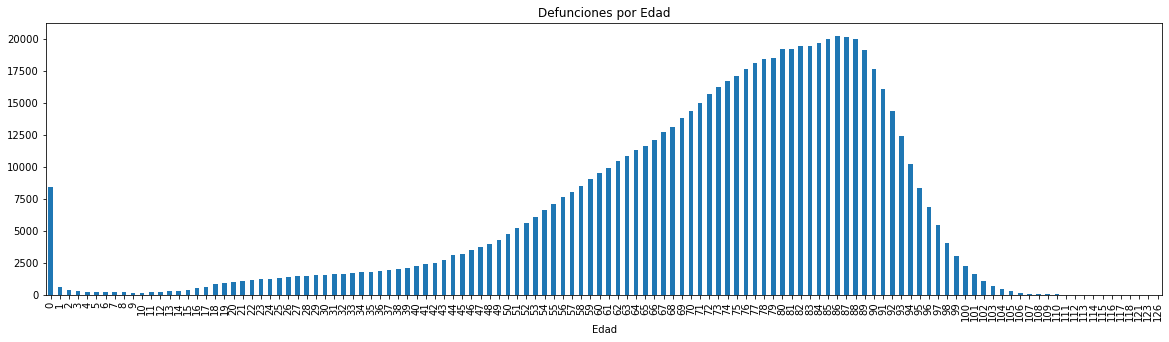

In [63]:
edad=df2.groupby(["EDAD_CANT"]).EDAD_CANT.count()
grafico = edad.plot(kind='bar', figsize=(20,5), xlabel='Edad', title='Defunciones por Edad')

In [67]:
#Tarjeta
cant=df2[(df2.EDAD_CANT==0)].EDAD_CANT.count()
print("Cantidad de defunciones antes del primer año")
print(format(cant,','))

Cantidad de defunciones antes del primer año
8,437


In [73]:
por_tipo_edad=df[(df.EDAD_TIPO!=1)].groupby(["EDAD_TIPO"]).EDAD_CANT.count()
por_tipo_edad.rename(index={2:'Meses'},inplace=True)
por_tipo_edad.rename(index={3:'Días'},inplace=True)
por_tipo_edad.rename(index={4:'Horas'},inplace=True)
por_tipo_edad

EDAD_TIPO
Meses    1978
Días     3101
Horas    3358
Name: EDAD_CANT, dtype: int64

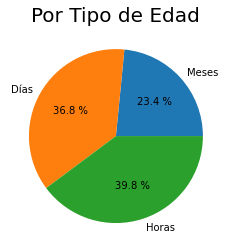

EDAD_TIPO
Meses    1978
Días     3101
Horas    3358
Name: EDAD_CANT, dtype: int64


In [98]:
#remuneracion = df1.groupby(['AÑO']).SUELDOS.sum()
#anio = df1['AÑO'].astype(int).unique()
plt.pie(por_tipo_edad, labels=por_tipo_edad.index, autopct="%0.1f %%")
plt.title(f'Por Tipo de Edad', size = 20)
plt.show()
print(por_tipo_edad)

In [16]:
#Mapa dummy
#import folium
#mapa = folium.Map(location=[-26.644033317886926, -69.74081887516468 ])
#mapa